##1. Устранение пропусков в данных


Загрузка и первичный анализ данных

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
# Будем использовать только обучающую выборку
hdata_loaded = pd.read_csv('tested.csv', sep=",")

In [ ]:
hdata_loaded.shape

(418, 12)

In [ ]:
hdata = hdata_loaded

In [ ]:
my_file = open("tested.csv","r")
dataset = pd.read_csv(my_file)

In [ ]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('PassengerId', dtype('int64')),
 ('Survived', dtype('int64')),
 ('Pclass', dtype('int64')),
 ('Name', dtype('O')),
 ('Sex', dtype('O')),
 ('Age', dtype('float64')),
 ('SibSp', dtype('int64')),
 ('Parch', dtype('int64')),
 ('Ticket', dtype('O')),
 ('Fare', dtype('float64')),
 ('Cabin', dtype('O')),
 ('Embarked', dtype('O'))]

In [ ]:
# Колонки с пропусками
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na

['Age', 'Fare', 'Cabin']

In [ ]:
hdata.shape

(418, 12)

In [ ]:
# Количество пропусков
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('Age', 86), ('Fare', 1), ('Cabin', 327)]

In [ ]:
# Доля (процент) пропусков
[(c, hdata[c].isnull().mean()) for c in hcols_with_na]

[('Age', 0.20574162679425836),
 ('Fare', 0.0023923444976076554),
 ('Cabin', 0.7822966507177034)]

In [ ]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = [ 'Age','Fare']

In [ ]:
# Удаление пропусков
hdata_drop = hdata[hcols_with_na_temp].dropna()
hdata_drop.shape

(331, 2)

In [ ]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

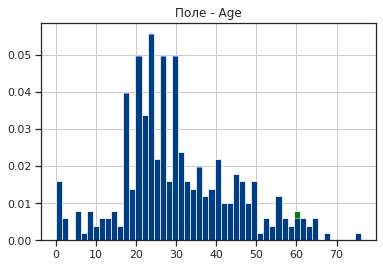

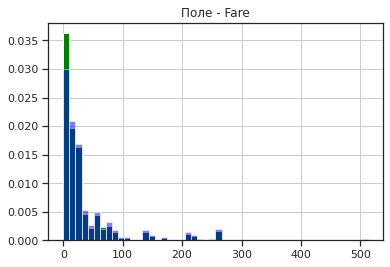

In [ ]:
plot_hist_diff(hdata, hdata_drop, hcols_with_na_temp)

Заполнение показателями центра распределения и константой

In [ ]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [ ]:
all_data, filled_data, missed_data = impute_column(hdata, 'Age', 'mean')
all_data

array([34.5       , 47.        , 62.        , 27.        , 22.        ,
       14.        , 30.        , 26.        , 18.        , 21.        ,
       30.27259036, 46.        , 23.        , 63.        , 47.        ,
       24.        , 35.        , 21.        , 27.        , 45.        ,
       55.        ,  9.        , 30.27259036, 21.        , 48.        ,
       50.        , 22.        , 22.5       , 41.        , 30.27259036,
       50.        , 24.        , 33.        , 30.27259036, 30.        ,
       18.5       , 30.27259036, 21.        , 25.        , 30.27259036,
       39.        , 30.27259036, 41.        , 30.        , 45.        ,
       25.        , 45.        , 30.27259036, 60.        , 36.        ,
       24.        , 27.        , 20.        , 28.        , 30.27259036,
       10.        , 35.        , 25.        , 30.27259036, 36.        ,
       17.        , 32.        , 18.        , 22.        , 13.        ,
       30.27259036, 18.        , 47.        , 31.        , 60.  

In [ ]:
filled_data


array([30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27259036,
       30.27259036, 30.27259036, 30.27259036, 30.27259036, 30.27

In [ ]:
missed_data


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
all_data, filled_data, missed_data = impute_column(hdata, 'Fare', 'mean')
all_data

array([  7.8292    ,   7.        ,   9.6875    ,   8.6625    ,
        12.2875    ,   9.225     ,   7.6292    ,  29.        ,
         7.2292    ,  24.15      ,   7.8958    ,  26.        ,
        82.2667    ,  26.        ,  61.175     ,  27.7208    ,
        12.35      ,   7.225     ,   7.925     ,   7.225     ,
        59.4       ,   3.1708    ,  31.6833    ,  61.3792    ,
       262.375     ,  14.5       ,  61.9792    ,   7.225     ,
        30.5       ,  21.6792    ,  26.        ,  31.5       ,
        20.575     ,  23.45      ,  57.75      ,   7.2292    ,
         8.05      ,   8.6625    ,   9.5       ,  56.4958    ,
        13.4167    ,  26.55      ,   7.85      ,  13.        ,
        52.5542    ,   7.925     ,  29.7       ,   7.75      ,
        76.2917    ,  15.9       ,  60.        ,  15.0333    ,
        23.        , 263.        ,  15.5792    ,  29.125     ,
         7.8958    ,   7.65      ,  16.1       , 262.375     ,
         7.8958    ,  13.5       ,   7.75      ,   7.72

In [ ]:
filled_data


array([35.62718849])

In [ ]:
missed_data

array([nan])

Введение отдельного значения категории для пропущенных значений

In [ ]:
hdata_cat_cols = ['Cabin']
hdata_cat_na = hdata[hdata_cat_cols].copy() 

In [ ]:
Cabin_cat_na_temp, _, _ = impute_column(hdata_cat_na, 'Cabin', 'constant', fill_value_param='NA')

In [ ]:
hdata_cat_na['Cabin'] = Cabin_cat_na_temp

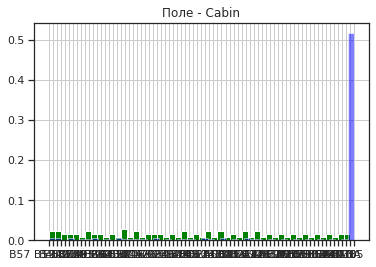

In [ ]:
plot_hist_diff(hdata, hdata_cat_na, hdata_cat_cols)

##2. Кодирование категориальных признаков

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Загрузка и предобработка данных

In [17]:
data_loaded = pd.read_csv('housing.csv', sep=",")

In [18]:
# размер набора данных
data_loaded.shape

(20640, 10)

In [19]:
data_loaded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
data_features = list(zip(
# признаки
[i for i in data_loaded.columns],
zip(
    # типы колонок
    [str(i) for i in data_loaded.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data_loaded.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('longitude', ('float64', 0)),
 ('latitude', ('float64', 0)),
 ('housing_median_age', ('float64', 0)),
 ('total_rooms', ('float64', 0)),
 ('total_bedrooms', ('float64', 207)),
 ('population', ('float64', 0)),
 ('households', ('float64', 0)),
 ('median_income', ('float64', 0)),
 ('median_house_value', ('float64', 0)),
 ('ocean_proximity', ('object', 0))]

In [21]:
data = data_loaded

In [22]:
# Удаляем пропуски
data.dropna(subset=['total_bedrooms'], inplace=True)

In [15]:
sns.countplot(data["total_bedrooms"])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bedrooms', ylabel='count'>

Error in callback <function flush_figures at 0x7f7a57a28d30> (for post_execute):


KeyboardInterrupt: ignored

In [23]:
# Убедимся что нет пустых значений
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Кодирование категорий наборами бинарных значений - one-hot encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['ocean_proximity']])
cat_enc_ohe

<20433x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20433 stored elements in Compressed Sparse Row format>

In [ ]:
cat_enc_ohe.todense()[0:1000]

matrix([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [ ]:
pd.get_dummies(data[['ocean_proximity']]).head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


##Нормализация числовых признаков

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
# Будем использовать только обучающую выборку
data = pd.read_csv('tested.csv', sep=",")

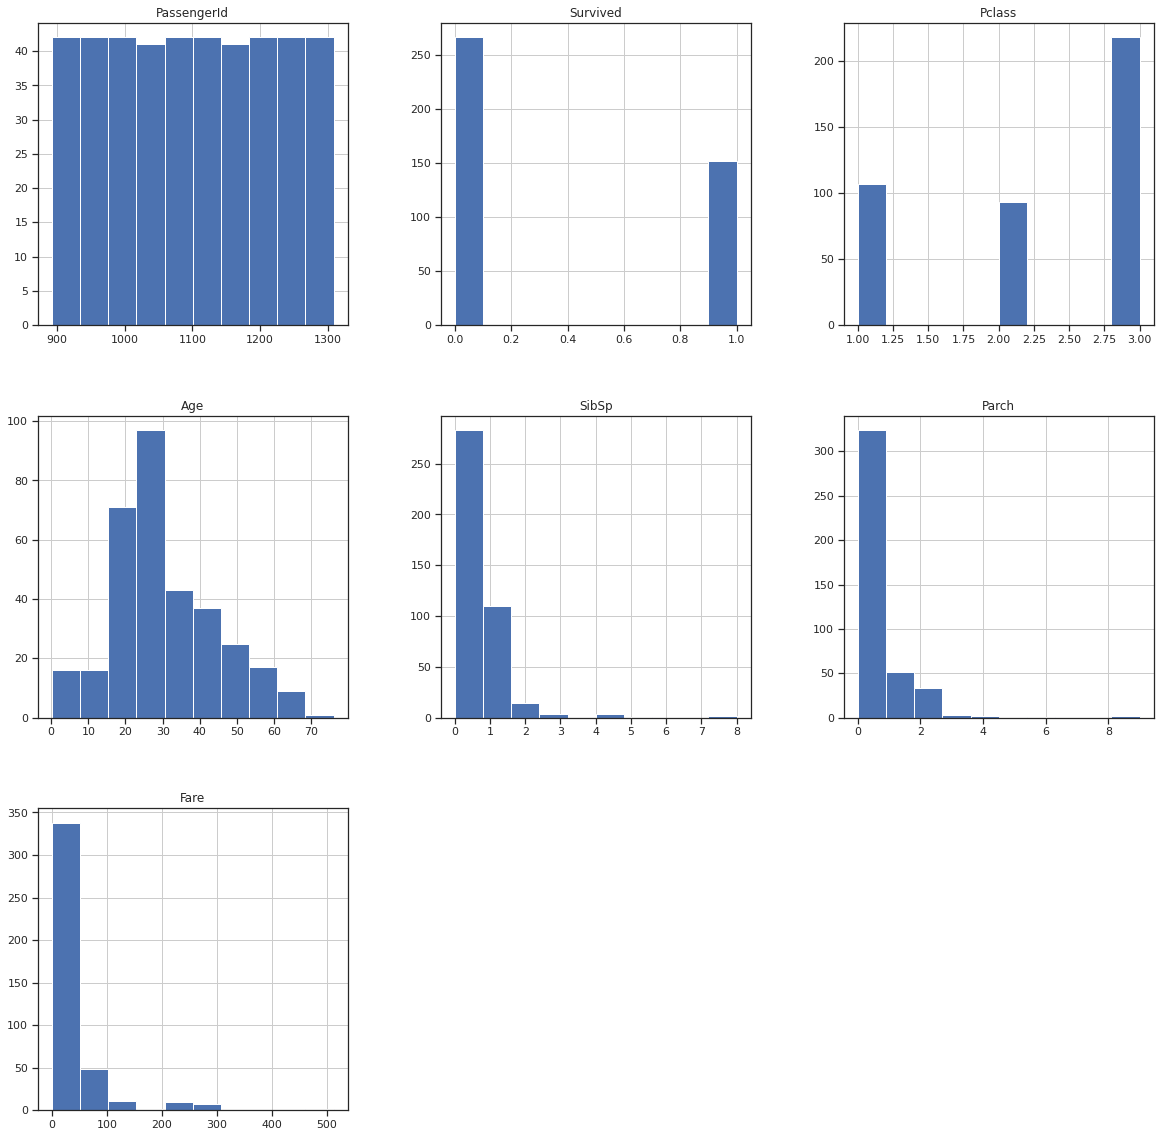

In [ ]:
data.hist(figsize=(20,20))
plt.show()

Исходное распределение

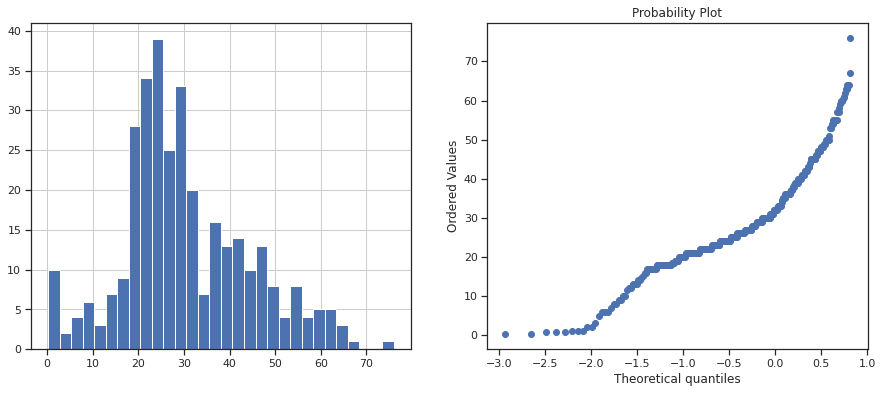

In [ ]:
diagnostic_plots(data, 'Age')

Логарифмическое преобразование

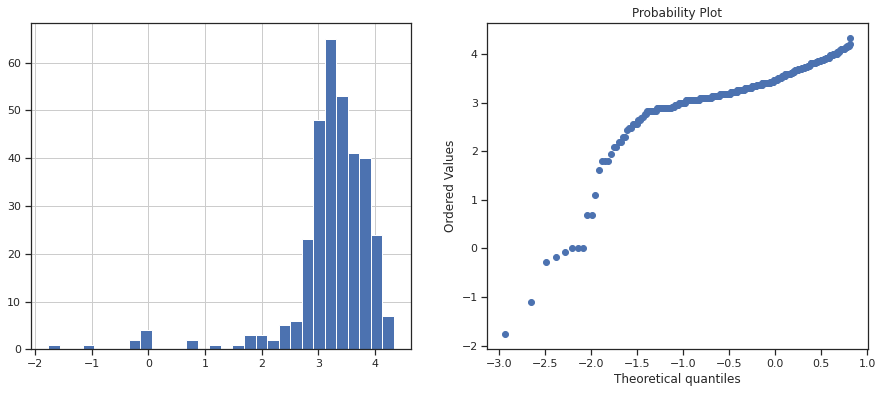

In [ ]:
data['Age_log'] = np.log(data['Age'])
diagnostic_plots(data, 'Age_log')

Обратное преобразование

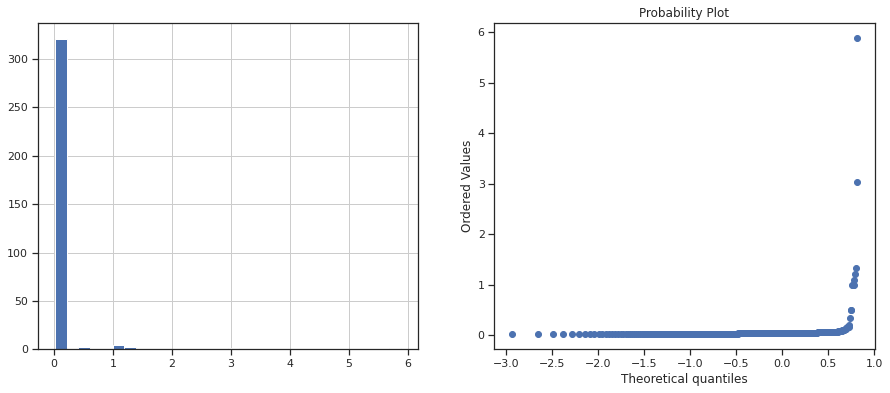

In [ ]:
data['Age_reciprocal'] = 1 / (data['Age']) 
diagnostic_plots(data, 'Age_reciprocal')

Квадратный корень

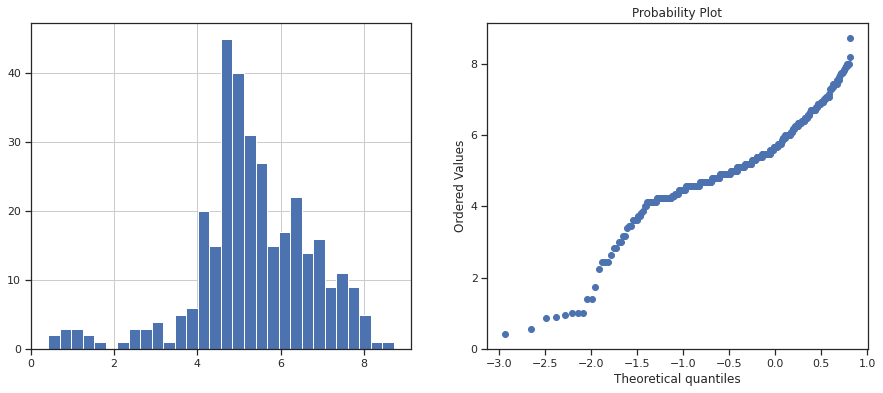

In [ ]:
data['Age_sqr'] = data['Age']**(1/2) 
diagnostic_plots(data, 'Age_sqr')

Возведение в степень

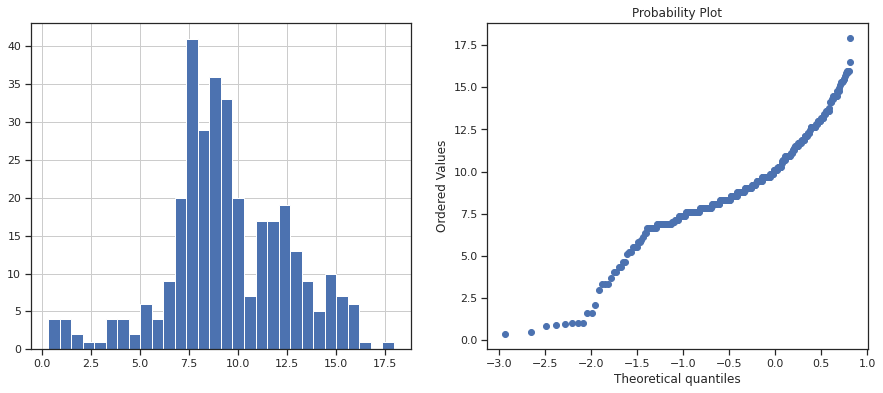

In [ ]:
data['Age_exp1'] = data['Age']**(1/1.5)
diagnostic_plots(data, 'Age_exp1')

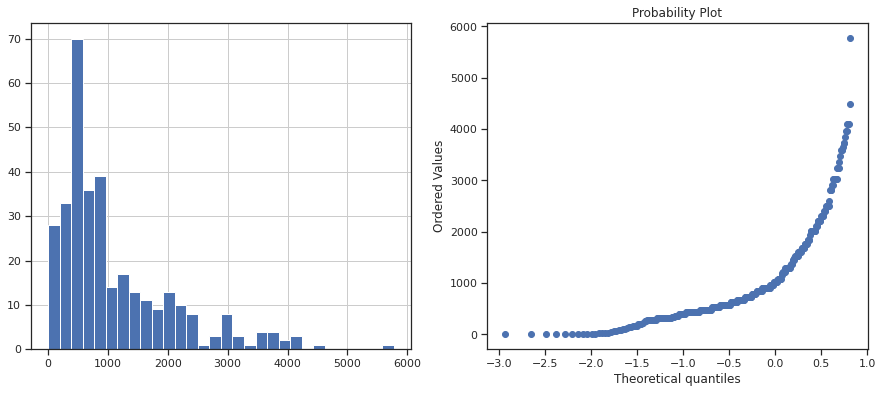

In [ ]:
data['Age_exp2'] = data['Age']**(2)
diagnostic_plots(data, 'Age_exp2')

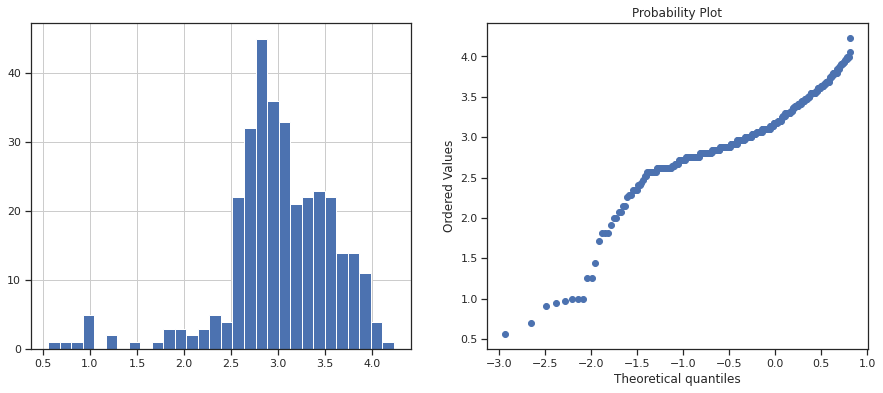

In [ ]:
data['Age_exp3'] = data['Age']**(0.333)
diagnostic_plots(data, 'Age_exp3')

Преобразование Бокса-Кокса

Оптимальное значение λ = 8.472135811722177


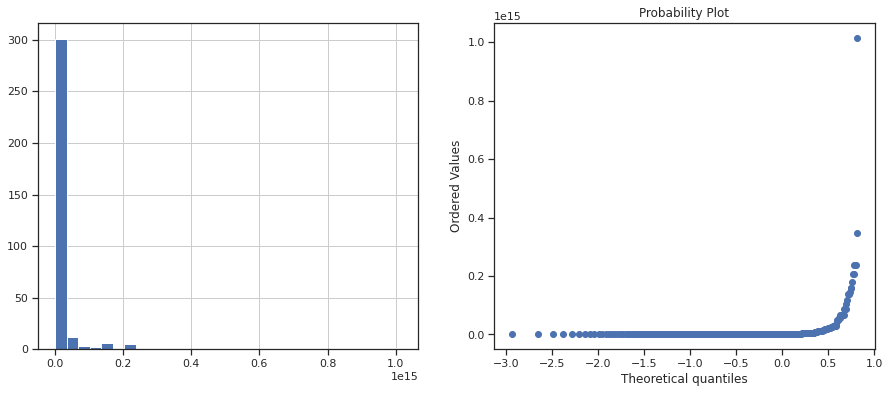

In [ ]:
data['Age_boxcox'], param = stats.boxcox(data['Age']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Age_boxcox')

Преобразование Йео-Джонсона

Оптимальное значение λ = 8.472135811722177


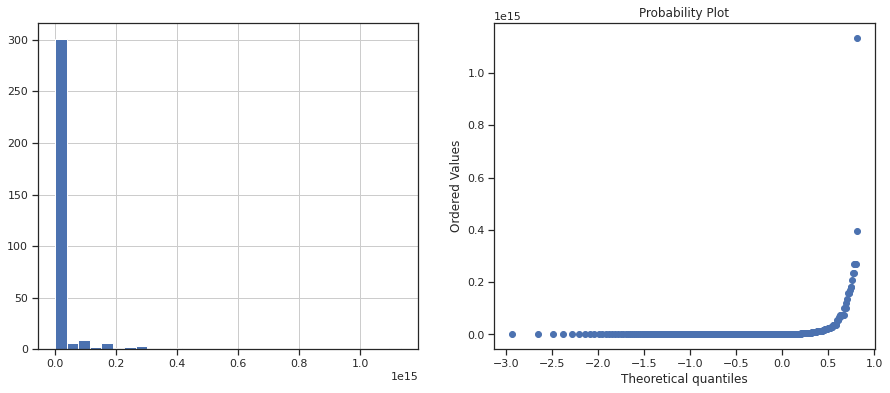

In [ ]:
# Необходимо преобразовать данные к действительному типу
data['Age'] = data['Age'].astype('float')
data['Age_yeojohnson'], param = stats.yeojohnson(data['Age']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Age_yeojohnson')